# House Prices: Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

<hr>

## Importar algunas librerias de Python

In [39]:
# datos
import pandas as pd
import numpy as np

# visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set_palette("deep")

<hr>

## Descargar los datos en .csv

In [40]:
train_data = pd.read_csv("train.csv")
print(train_data.shape)
train_data.tail()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [41]:
test_data = pd.read_csv("test.csv")
print(test_data.shape)
test_data.tail()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


<hr>

## Tratar con los valores categoricos

Podemos ver la cantidad de valores nulos con el siguiente codigo.

Tenemos que tratar con los valores nulos correctamente para hacer el modelo de regresion.

In [42]:
print("Valores nulos en el Dataset: \n\n{}\n".format(train_data.isnull().sum(axis = 0)[train_data.isnull().sum(axis = 0)>0]))

Valores nulos en el Dataset: 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64



Hay demasiados valores nulos en las columnas Alley, PoolQC, Fence y MiscFeature.
Si tenemos en cuenta que hay 1460 valores en total, lo mejor que podemos hacer es borrar estas columnas.

In [43]:
df = train_data.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], axis = 1)
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


Valores nulos despues de borrar las columnas.

In [44]:
print("Valores nulos en el dataset: \n\n{}\n".format(df.isnull().sum(axis = 0)[df.isnull().sum(axis = 0)>0]))

Valores nulos en el dataset: 

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64



Revisamos los tipos de datos en cada columna

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Para sustituir los valores nulos es necesario transformas las columnas categoricas a numericas.
Entonces seleccionamos las columnas categoricas:

In [46]:
obj_col = df.select_dtypes("object").columns
print(obj_col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


Creamos un diccionario para cada columna, guardando su valor categorico y un valor numerico de 1 a n, donde n es la cantidad de valores categoricos.

In [47]:
sust = []
for col in obj_col:
    dic = {}
    for i,t in enumerate(df[col].unique()):
        dic[t] = i
    sust.append(dic)

Y luego sustituimos estos valores en cada una de las columnas, teniendo así unicamente valores númericos.

In [48]:
cleanup_nums = dict()
for i in range(len(obj_col)):
    cleanup_nums[obj_col[i]] = sust[i]

df1 = df.replace(cleanup_nums, inplace = False)
df1.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,0,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125
1459,1460,20,0,75.0,9937,0,0,0,0,0,...,0,0,0,0,0,6,2008,0,0,147500


<hr>

## Tratar con Outliers

Creamos funcion que caluciula el Z-score para cada valor y regresa una lista con los valores que son outliers

In [49]:
def Zscore_outlier(df):
    out = set()
    for i in df: 
        z = (i-np.mean(df))/np.std(df)
        if np.abs(z) > 3: 
            out.add(i)
    return out

Hacemos nulos estos valores que son outliers para cada una de las columnas

In [50]:
df2 = df1.copy()
for col in df1.columns:
    outliers = Zscore_outlier(df1[col])
    df2[col] = df1.loc[~df1[col].isin(outliers)][col]

Podemos verificar como estos valores fueron eliminados

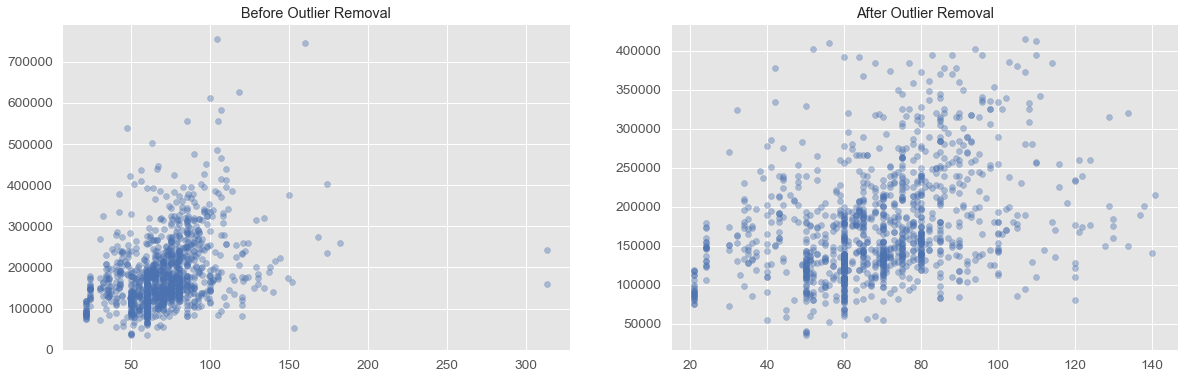

In [51]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].scatter(df1.LotFrontage, df1.SalePrice, alpha = 0.4)
ax[0].set_title("Before Outlier Removal")
ax[1].scatter(df2.LotFrontage, df2.SalePrice, alpha = 0.4)
ax[1].set_title("After Outlier Removal")
plt.show()

Revisamos cual es el numero maximo de valores nulos por columna en el dataset

In [52]:
df2.isnull().sum(axis = 0)[df2.isnull().sum(axis = 0)>0].max()

271

<hr>

## Imputar los valores nulos

Realizamos un imputer con todos los valores nulos

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df2)
IterativeImputer(random_state=0)
df3 = pd.DataFrame(imp_mean.transform(df2), columns= df2.columns)
df3.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456.0,60.0,0.0,62.0,7917.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,8.0,2007.0,0.0,0.0,175000.0
1456,1457.0,20.0,0.0,85.0,13175.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,2.0,2010.0,0.0,0.0,210000.0
1457,1458.0,70.0,0.0,66.0,9042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.163564,5.0,2010.0,0.0,0.0,266500.0
1458,1459.0,20.0,0.0,68.0,9717.0,0.0,0.0,0.0,0.0,0.0,...,112.0,0.0,0.0,0.0,0.000000,4.0,2010.0,0.0,0.0,142125.0
1459,1460.0,20.0,0.0,75.0,9937.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,6.0,2008.0,0.0,0.0,147500.0


Imprimimos los valores nulos

In [54]:
print("Valores nulos del dataset: \n\n{}\n".format(df3.isnull().sum(axis = 0)[df3.isnull().sum(axis = 0)>0]))

Valores nulos del dataset: 

Series([], dtype: int64)



<hr>

## Visualizacion de los datos

Visualizamos las columnas con un coeficiente de correlacion mayor a 0.4

[]

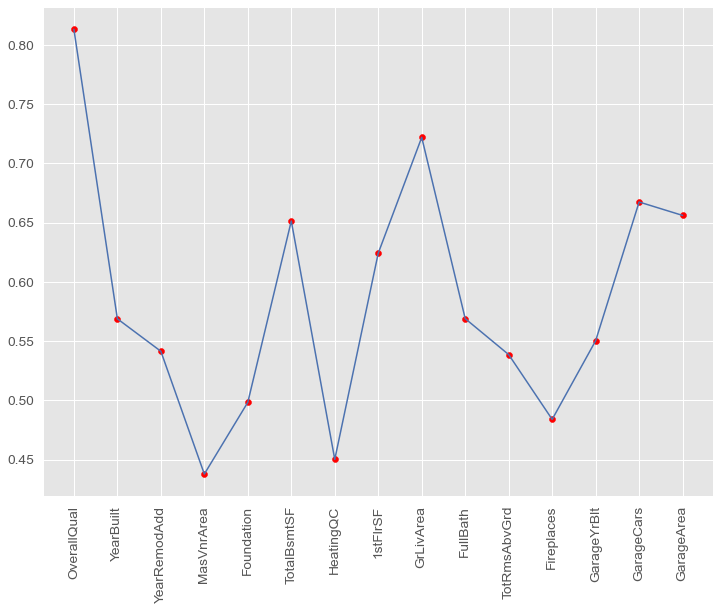

In [55]:
f, ax = plt.subplots(figsize=(12, 9))
df_ = abs(pd.DataFrame(df3.corr().SalePrice[abs(df3.corr().SalePrice) > 0.4][:-1]))
plt.plot(df_)
plt.scatter(df_.index, df_.values, color = "red")
plt.xticks(rotation=90)
plt.plot()

Correlación entre todas las columnas

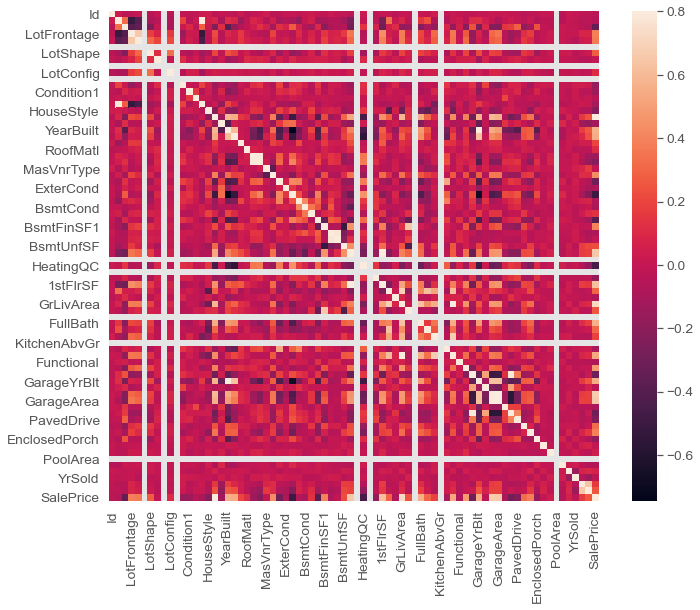

In [56]:
#correlation matrix
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Correlación entre las 10 columnas más correlacionadas

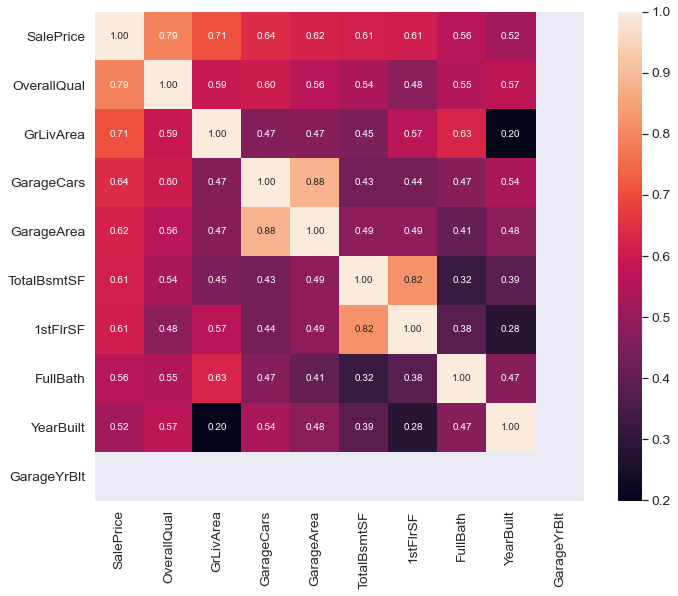

In [57]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9)) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<hr>

## Separar los datos

Separamos los predictores del target

In [58]:
features = df3.drop('SalePrice', axis = 1)
target = df3['SalePrice']

Normalizamos los datos

In [59]:
from sklearn.preprocessing import StandardScaler

col_names = features.columns
scaler = StandardScaler()
scaler.fit(features)
features = pd.DataFrame(scaler.transform(features), columns = col_names)
features.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1455,1.721374,0.142027,-0.453477,-0.385995,-0.440978,0.0,-0.724218,-0.264065,0.0,-0.590493,...,-0.029858,-0.343156,-0.026531,-0.211285,0.0,-0.160414,0.620891,-0.614439,-0.339792,-0.408609
1456,1.723747,-0.914263,-0.453477,0.765100,0.762075,0.0,-0.724218,-0.264065,0.0,-0.590493,...,-0.779065,-0.343156,-0.026531,-0.211285,0.0,-0.160414,-1.599111,1.645210,-0.339792,-0.408609
1457,1.726120,0.406100,-0.453477,-0.185804,-0.183573,0.0,-0.724218,-0.264065,0.0,-0.590493,...,0.344745,-0.343156,-0.026531,-0.211285,0.0,-0.104566,-0.489110,1.645210,-0.339792,-0.408609
1458,1.728492,-0.914263,-0.453477,-0.085709,-0.029130,0.0,-0.724218,-0.264065,0.0,-0.590493,...,-0.779065,2.388824,-0.026531,-0.211285,0.0,-0.160414,-0.859110,1.645210,-0.339792,-0.408609
1459,1.730865,-0.914263,-0.453477,0.264624,0.021206,0.0,-0.724218,-0.264065,0.0,-0.590493,...,0.494587,-0.343156,-0.026531,-0.211285,0.0,-0.160414,-0.119110,0.138777,-0.339792,-0.408609


Elegimos las columnas a usar mediante el metodo de feature selection

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

regression_model = SGDRegressor().fit(features, target)

rfe = RFE(estimator=regression_model, step=1)
rfe.fit(features, target)

print("Optimal number of features : %d" % rfe.n_features_)
col = features.columns[rfe.support_]
features = features[col]
print(rfe.ranking_)
features.tail()

Optimal number of features : 37
[19 27  1 15  1 33  6 13 37 28 38  3  1 21  1 24  1  1  1  1 18  1  1  1
  1  1  9  5  1  1 11  1  2  1  1  1 23  1 36  1 35  4  1  1  8  1  7 34
 30 17  1 39  1  1  1  1  1  1  1  1  1 10 29 16  1  1 12 22 14 32 26 31
 20 25  1]


,MSZoning,LotArea,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
1455,-0.453477,-0.440978,-0.313558,-0.42322,-0.075105,-0.550153,0.925208,0.733308,-0.066241,-0.893321,...,-0.188070,0.624561,-0.616956,0.879991,-1.229033,0.311725,-0.051452,-0.795379,-0.029858,-0.408609
1456,-0.453477,0.762075,-0.313558,-0.42322,-0.075105,0.431722,0.219868,0.151865,-0.066241,1.990520,...,3.949446,2.211404,-0.616956,0.052439,-0.072855,0.311725,0.141179,2.377924,-0.779065,-0.408609
1457,-0.453477,-0.183573,-0.313558,-0.42322,0.653569,1.933233,-1.022872,1.024029,-0.066241,1.578543,...,-0.188070,2.211404,-0.616956,-1.405628,-1.229033,-1.026858,-1.053137,-0.795379,0.344745,-0.408609
1458,-0.453477,-0.029130,-0.313558,-0.42322,-0.803779,0.431722,-0.720584,0.539493,-0.066241,-0.481343,...,-0.188070,-0.962282,-0.616956,-1.050963,-0.072855,-1.026858,-1.110926,2.532498,-0.779065,-0.408609
1459,-0.453477,0.021206,-0.313558,-0.42322,-0.803779,0.431722,-0.216770,-0.962566,-0.066241,0.342611,...,-0.188070,-0.962282,-0.616956,-0.459855,1.083323,-1.026858,-0.937558,-0.091109,0.494587,-0.408609


Separamos los datos de entrenamiento y los de validacion

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=133)

<hr>

## Modelo

Aplicamos SGD con cross validation

In [277]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

scores = []
regression_model = LinearRegression().fit(X_train, y_train)
linear_scores = cross_val_score(regression_model, features, target, cv=5)
scores.append(linear_scores.mean())

regression_model = KNeighborsRegressor().fit(X_train, y_train)
knn_scores = cross_val_score(regression_model, features, target, cv=5)
scores.append(knn_scores.mean())

regression_model = SGDRegressor().fit(X_train, y_train)
sgd_scores = cross_val_score(regression_model, features, target, cv=5)
scores.append(sgd_scores.mean())

regression_model = DecisionTreeRegressor().fit(X_train, y_train)
tree_scores = cross_val_score(regression_model, features, target, cv=5)
scores.append(tree_scores.mean())

regression_model = xgb.XGBRegressor().fit(X_train, y_train)
xgb_scores = cross_val_score(regression_model, features, target, cv=5)
scores.append(xgb_scores.mean())

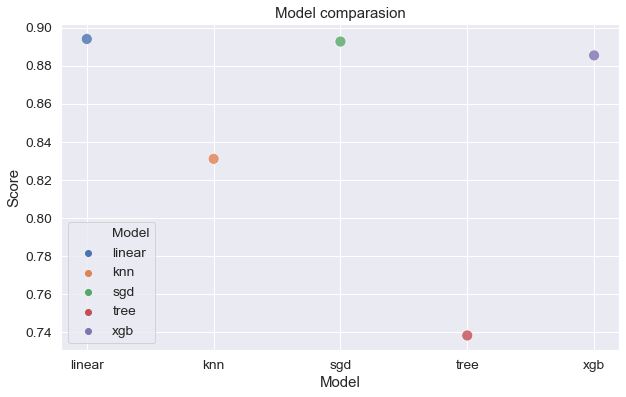

In [278]:
df_ = pd.DataFrame()
df_["Model"] = ["linear","knn","sgd","tree", "xgb"]
df_["Score"] = scores

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = df_.Model, y =  df_.Score, alpha = 0.8, hue = df_.Model, s = 120)
plt.title("Model comparasion")
plt.show()

In [279]:
# make a prediction with a stacking ensemble
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('tree', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level0.append(('xgb', xgb.XGBRegressor()))
level0.append(('sgd', SGDRegressor()))

# define meta learner model
level1 = LinearRegression()

# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(X_test, y_test)
# make a prediction for one example
score = cross_val_score(model, features, target, cv=5)
print(score.mean())

scores.append(score.mean())

0.9085201874896252


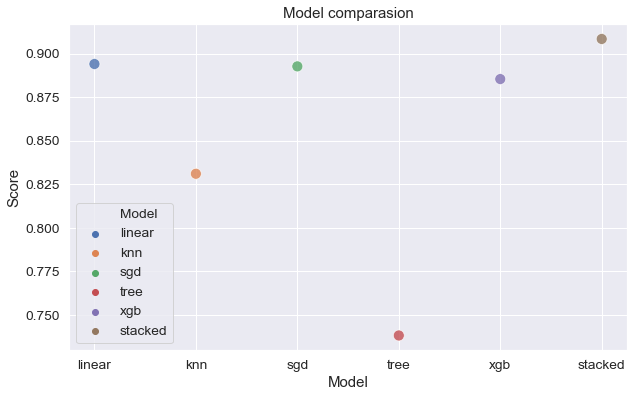

In [280]:
df_ = pd.DataFrame()
df_["Model"] = ["linear","knn","sgd","tree", "xgb", "stacked"]
df_["Score"] = scores

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = df_.Model, y =  df_.Score, alpha = 0.8, hue = df_.Model, s = 120)
plt.title("Model comparasion")
plt.show()

In [268]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model_keras = Sequential()
model_keras.add(Dense(200, input_dim=len(features.columns), kernel_initializer='normal', activation='relu'))
model_keras.add(Dense(100, kernel_initializer='normal', activation='relu'))
model_keras.add(Dense(50, kernel_initializer='normal', activation='relu'))
model_keras.add(Dense(25, kernel_initializer='normal', activation='relu'))
model_keras.add(Dense(1, kernel_initializer='normal'))
# Compile model
model_keras.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

model_keras.fit(np.array(features), np.array(target.values), epochs=100, batch_size=10)

Epoch 1/100
146/146 [==============================] - 0s 1ms/step - loss: 36975980544.0000
Epoch 2/100
146/146 [==============================] - 0s 1ms/step - loss: 36975988736.0000
Epoch 3/100
146/146 [==============================] - 0s 2ms/step - loss: 36975992832.0000
Epoch 4/100
146/146 [==============================] - 0s 2ms/step - loss: 36975984640.0000
Epoch 5/100
146/146 [==============================] - 0s 1ms/step - loss: 36975996928.0000
Epoch 6/100
146/146 [==============================] - 0s 1ms/step - loss: 36975992832.0000
Epoch 7/100
146/146 [==============================] - 0s 1ms/step - loss: 36975996928.0000
Epoch 8/100
146/146 [==============================] - 0s 1ms/step - loss: 36975996928.0000
Epoch 9/100
146/146 [==============================] - 0s 1ms/step - loss: 36975988736.0000
Epoch 10/100
146/146 [==============================] - 0s 2ms/step - loss: 36975996928.0000
Epoch 11/100
146/146 [==============================] - 0s 1ms/step - loss: 369

In [292]:
((model.predict(X_test) - y_test)**2).mean()

381534850.62873596

<hr>

# Aplicar el Modelo 

## Procesar datos

In [66]:
df_test = test_data[col]
df_test.tail()

,MSZoning,LotArea,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
1454,RM,1936,Norm,Twnhs,4,7,1970,1970,CompShg,CemntBd,...,Typ,0,NaN,NaN,NaN,0.0,0.0,0,0,Normal
1455,RM,1894,Norm,TwnhsE,4,5,1970,1970,CompShg,CemntBd,...,Typ,0,CarPort,1970.0,Unf,1.0,286.0,0,24,Abnorml
1456,RL,20000,Norm,1Fam,5,7,1960,1996,CompShg,VinylSd,...,Typ,1,Detchd,1960.0,Unf,2.0,576.0,474,0,Abnorml
1457,RL,10441,Norm,1Fam,5,5,1992,1992,CompShg,HdBoard,...,Typ,0,NaN,NaN,NaN,0.0,0.0,80,32,Normal
1458,RL,9627,Norm,1Fam,7,5,1993,1994,CompShg,HdBoard,...,Typ,1,Attchd,1993.0,Fin,3.0,650.0,190,48,Normal


Sustituimos los valores categoricos

In [67]:
obj_col = df_test.select_dtypes("object").columns
print(obj_col)

sust = []
for col in obj_col:
    dic = {}
    for i,t in enumerate(df_test[col].unique()):
        dic[t] = i
    sust.append(dic)

cleanup_nums = dict()
for i in range(len(obj_col)):
    cleanup_nums[obj_col[i]] = sust[i]

df_test1 = df_test.replace(cleanup_nums, inplace = False)
df_test1.tail()

Index(['MSZoning', 'Condition1', 'BldgType', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'SaleCondition'],
      dtype='object')


,MSZoning,LotArea,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
1454,2,1936,1,2,4,7,1970,1970,0,5,...,0,0,3,NaN,3,0.0,0.0,0,0,0
1455,2,1894,1,1,4,5,1970,1970,0,5,...,0,0,6,1970.0,0,1.0,286.0,0,24,2
1456,1,20000,1,0,5,7,1960,1996,0,0,...,0,1,1,1960.0,0,2.0,576.0,474,0,2
1457,1,10441,1,0,5,5,1992,1992,0,2,...,0,0,3,NaN,3,0.0,0.0,80,32,0
1458,1,9627,1,0,7,5,1993,1994,0,2,...,0,1,0,1993.0,1,3.0,650.0,190,48,0


Eliminanos Outliers

In [68]:
df_test2 = df_test1.copy()
for col in df_test1.columns:
    outliers = Zscore_outlier(df_test1[col])
    df_test2[col] = df_test1.loc[~df_test1[col].isin(outliers)][col]
df_test2.tail()

,MSZoning,LotArea,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
1454,2.0,1936.0,1.0,2.0,4.0,7.0,1970.0,1970,0.0,5.0,...,0.0,0.0,3.0,NaN,3,0.0,0.0,0.0,0.0,0.0
1455,2.0,1894.0,1.0,1.0,4.0,5.0,1970.0,1970,0.0,5.0,...,0.0,0.0,NaN,1970.0,0,1.0,286.0,0.0,24.0,2.0
1456,1.0,20000.0,1.0,0.0,5.0,7.0,1960.0,1996,0.0,0.0,...,0.0,1.0,1.0,1960.0,0,2.0,576.0,474.0,0.0,2.0
1457,1.0,10441.0,1.0,0.0,5.0,5.0,1992.0,1992,0.0,2.0,...,0.0,0.0,3.0,NaN,3,0.0,0.0,80.0,32.0,0.0
1458,1.0,9627.0,1.0,0.0,7.0,5.0,1993.0,1994,0.0,2.0,...,0.0,1.0,0.0,1993.0,1,3.0,650.0,190.0,48.0,0.0


Imputar datos nulos

In [69]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_test2)
IterativeImputer(random_state=0)
df_test3 = pd.DataFrame(imp_mean.transform(df_test2), columns= df_test2.columns)
df_test3.tail()

,MSZoning,LotArea,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
1454,2.0,1936.0,1.0,2.0,4.0,7.0,1970.0,1970.0,0.0,5.0,...,0.0,0.0,3.000000,1959.408157,3.0,0.0,0.0,0.0,0.0,0.0
1455,2.0,1894.0,1.0,1.0,4.0,5.0,1970.0,1970.0,0.0,5.0,...,0.0,0.0,1.008719,1970.000000,0.0,1.0,286.0,0.0,24.0,2.0
1456,1.0,20000.0,1.0,0.0,5.0,7.0,1960.0,1996.0,0.0,0.0,...,0.0,1.0,1.000000,1960.000000,0.0,2.0,576.0,474.0,0.0,2.0
1457,1.0,10441.0,1.0,0.0,5.0,5.0,1992.0,1992.0,0.0,2.0,...,0.0,0.0,3.000000,1974.447378,3.0,0.0,0.0,80.0,32.0,0.0
1458,1.0,9627.0,1.0,0.0,7.0,5.0,1993.0,1994.0,0.0,2.0,...,0.0,1.0,0.000000,1993.000000,1.0,3.0,650.0,190.0,48.0,0.0


Normalizar los datos

In [70]:
from sklearn.preprocessing import StandardScaler

col_names = df_test3.columns
scaler = StandardScaler()
scaler.fit(df_test3)
df_test3 = pd.DataFrame(scaler.transform(df_test3), columns = col_names)
df_test3.tail()

,MSZoning,LotArea,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,...,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
1454,1.324622,-2.026055,-0.104562,2.427636,-1.460135,1.455805,-0.046723,-0.646813,0.0,1.362974,...,-0.227558,-0.916917,2.923813,-0.623638,2.158996,-2.287638,-2.242151,-0.788781,-0.785633,-0.39683
1455,1.324622,-2.037287,-0.104562,1.019511,-1.460135,-0.560567,-0.046723,-0.646813,0.0,1.362974,...,-0.227558,-0.916917,0.527496,-0.222223,-0.993080,-0.990442,-0.877255,-0.788781,-0.354620,3.36090
1456,-0.476721,2.804873,-0.104562,-0.388614,-0.759061,1.455805,-0.377288,0.584059,0.0,-0.961792,...,-0.227558,0.686058,0.517003,-0.601208,-0.993080,0.306754,0.506731,3.525674,-0.785633,3.36090
1457,-0.476721,0.248472,-0.104562,-0.388614,-0.759061,-0.560567,0.680522,0.394694,0.0,-0.031886,...,-0.227558,-0.916917,2.923813,-0.053674,2.158996,-2.287638,-2.242151,-0.060603,-0.210949,-0.39683
1458,-0.476721,0.030780,-0.104562,-0.388614,0.643088,-0.560567,0.713579,0.489377,0.0,-0.031886,...,-0.227558,0.686058,-0.686401,0.649443,0.057612,1.603950,0.859886,0.940642,0.076393,-0.39683


Predecir el precio

In [288]:
y_hat = model.predict(df_test3)

Generar el df

In [289]:
df_out = test_data[["Id"]]
df_out["SalePrice"] = y_hat
df_out = df_out.set_index("Id")
df_out.tail()

,SalePrice
Id,
2915,76307.314511
2916,88431.776444
2917,189401.480389
2918,117452.335571
2919,254549.818936


Exportar a CSV

In [260]:
df_out.to_csv("results.csv")